In [1]:
import pandas as pd
import prophet as Prophet
from datetime import datetime

Importing plotly failed. Interactive plots will not work.


In [3]:
letran_mechanical = pd.read_csv('CSV/board-exam-results - LETRAN-Mechanical.csv')

letran_mechanical['Year'] = letran_mechanical['Time Date'].apply(lambda x: str(x)[-4:])
letran_mechanical['Month'] = letran_mechanical['Time Date'].apply(lambda x: str(x)[-6:-4])
letran_mechanical['Day'] = letran_mechanical['Time Date'].apply(lambda x: str(x)[:-6])
letran_mechanical['ds'] = pd.DatetimeIndex(letran_mechanical['Year']+'-'+letran_mechanical['Month']+'-'+letran_mechanical['Day'])

letran_mechanical.drop(['Time Date', 'School', 'Course', 'Year', 'Month', 'Day'], axis=1, inplace=True)
letran_mechanical.columns = ['y', 'ds']

m = Prophet.Prophet(interval_width=0.95)
m.add_seasonality(name='yearly', period=365.25, fourier_order=10)
m.add_seasonality(name='semi-annual', period=365.25/2, fourier_order=10)
letran_mechanical_model = m.fit(letran_mechanical)

# Create a list of dates for which you want to make predictions
specific_dates = [datetime(2023, 3, 22), datetime(2023, 10, 3), datetime(2024, 3, 22), datetime(2024, 10, 3), datetime(2025, 3, 22), datetime(2025, 10, 3), datetime(2026, 3, 22), datetime(2026, 10, 3), datetime(2027, 3, 22), datetime(2027, 10, 3), datetime(2028, 3, 22), datetime(2028, 10, 3), datetime(2029, 3, 22), datetime(2029, 10, 3), datetime(2030, 3, 22), datetime(2030, 10, 3)]

# Create a dataframe with those specific dates
letran_mechanical_future = pd.DataFrame({'ds': specific_dates})

# Get predictions for those specific dates
letran_mechanical_forecast = m.predict(letran_mechanical_future)
letran_mechanical_forecast['yhat'] = letran_mechanical_forecast['yhat'].clip(lower=0, upper=100).round()

12:31:06 - cmdstanpy - INFO - Chain [1] start processing
12:31:06 - cmdstanpy - INFO - Chain [1] done processing


In [4]:
letran_mechanical_forecast[['ds', 'yhat']]

,ds,yhat
0,2023-03-22,55.0
1,2023-10-03,53.0
2,2024-03-22,55.0
3,2024-10-03,60.0
4,2025-03-22,55.0
5,2025-10-03,58.0
6,2026-03-22,55.0
7,2026-10-03,56.0
8,2027-03-22,55.0
9,2027-10-03,53.0


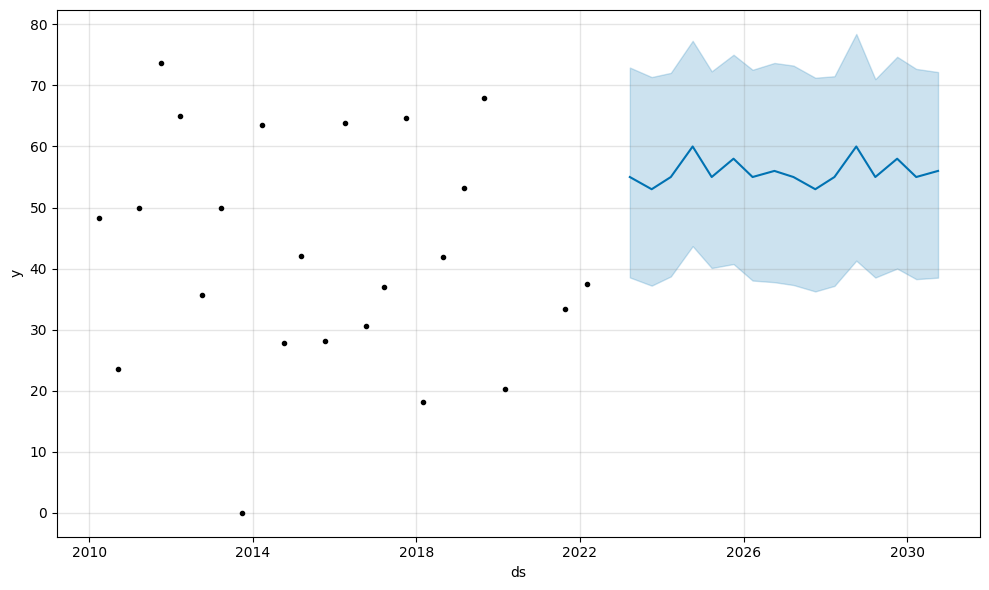

In [5]:
letran_mechanical_plot = m.plot(letran_mechanical_forecast)

In [8]:
perps_mechanical = pd.read_csv('CSV/board-exam-results - PERP-Mechanical.csv')

perps_mechanical['Year'] = perps_mechanical['Time Date'].apply(lambda x: str(x)[-4:])
perps_mechanical['Month'] = perps_mechanical['Time Date'].apply(lambda x: str(x)[-6:-4])
perps_mechanical['Day'] = perps_mechanical['Time Date'].apply(lambda x: str(x)[:-6])
perps_mechanical['ds'] = pd.DatetimeIndex(perps_mechanical['Year']+'-'+perps_mechanical['Month']+'-'+perps_mechanical['Day'])

perps_mechanical.drop(['Time Date', 'School', 'Course', 'Year', 'Month', 'Day'], axis=1, inplace=True)
perps_mechanical.columns = ['y', 'ds']

m = Prophet.Prophet(interval_width=0.95)
m.add_seasonality(name='yearly', period=365.25, fourier_order=10)
m.add_seasonality(name='semi-annual', period=365.25/2, fourier_order=10)
perps_mechanical_model = m.fit(perps_mechanical)

# Create a list of dates for which you want to make predictions
specific_dates = [datetime(2023, 4, 24), datetime(2023, 9, 6), datetime(2024, 4, 24), datetime(2024, 9, 6), datetime(2025, 4, 24), datetime(2025, 9, 6), datetime(2026, 4, 24), datetime(2026, 9, 6), datetime(2027, 4, 24), datetime(2027, 9, 6), datetime(2028, 4, 24), datetime(2028, 9, 6), datetime(2029, 4, 24), datetime(2029, 9, 6), datetime(2030, 4, 24), datetime(2030, 9, 6)]

# Create a dataframe with those specific dates
perps_mechanical_future = pd.DataFrame({'ds': specific_dates})

# Get predictions for those specific dates
perps_mechanical_forecast = m.predict(perps_mechanical_future)
perps_mechanical_forecast['yhat'] = perps_mechanical_forecast['yhat'].clip(lower=0, upper=100).round()

13:00:05 - cmdstanpy - INFO - Chain [1] start processing
13:00:05 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
perps_mechanical_forecast[['ds', 'yhat']]

,ds,yhat
0,2023-04-24,8.0
1,2023-09-06,39.0
2,2024-04-24,21.0
3,2024-09-06,24.0
4,2025-04-24,15.0
5,2025-09-06,27.0
6,2026-04-24,9.0
7,2026-09-06,30.0
8,2027-04-24,2.0
9,2027-09-06,33.0


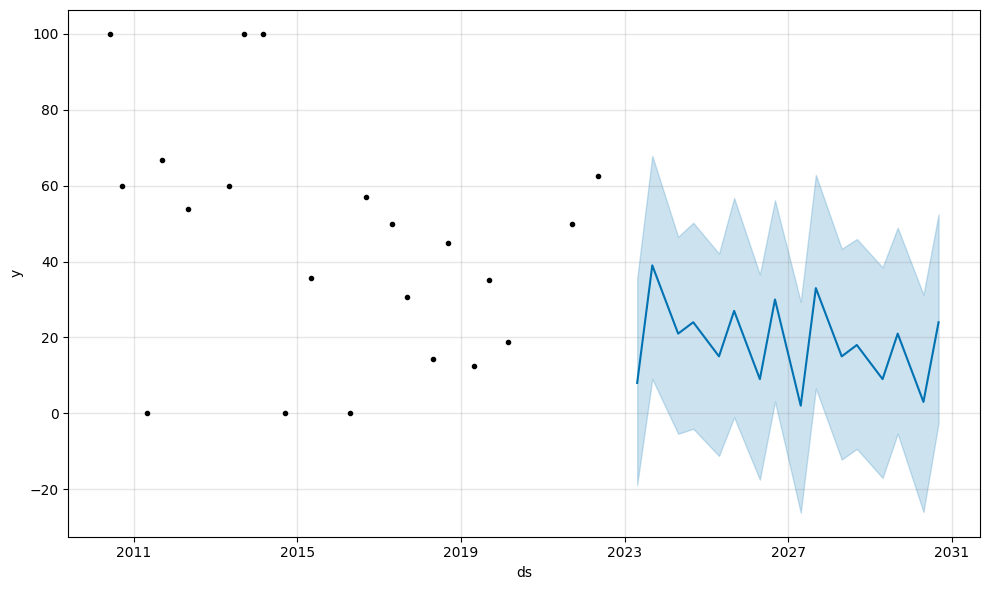

In [10]:
perps_mechanical_plot = m.plot(perps_mechanical_forecast)